In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [41]:
import math as m
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = m.sqrt(3/2 * m.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e40
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

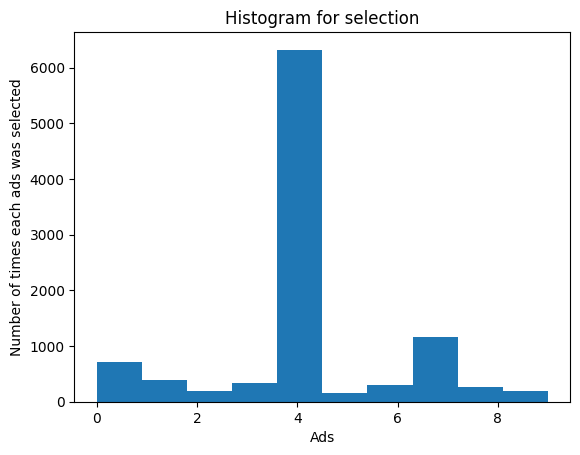

In [42]:
plt.hist(ads_selected)
plt.title('Histogram for selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ads was selected')
plt.show()